<a href="https://www.kaggle.com/code/zeeshanahmadyar/create-linear-algorithm?scriptVersionId=282593239" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placementcsv/placement.csv


# **Simple Linear Regression**

In [2]:
df = pd.read_csv('/kaggle/input/placementcsv/placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


# **Divide data into training and testing**

In [3]:
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# **Now we create our own Regression Model**

> **Slop (m), and Intercept(b) formulas.**

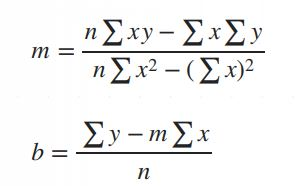

# **Linear Regression Algorithm**
We create our own **Algorithm** for **Linear regression** using **Python Class**

In [5]:
class ownRegression:
    def __init__(self):
        self.m = None
        self.b = None 

    # Model Fitting def
    def fit(self, X_train, y_train):
        nom = 0
        den = 0

        for i in range(X_train.shape[0]):
            nom = nom + ((X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean()))

        self.m = nom/den
        self.b = y_train.mean() - (self.m * X_train.mean())

    def prediction(self, X_test):
        return self.m * X_test + self.b

In [6]:
# Create Object for Model
model = ownRegression()
model.fit(X_train, y_train)

In [7]:
print(y_test[0])

4.1


In [8]:
y_pred = model.prediction(X_test)

# **Comparision Between real and predicted result**

In [9]:
print('Our own Linear Regression Algorithm:')
print('-' * 30)

print(f'Real Value: {y_test} - Predicted Value {y_pred}')

Our own Linear Regression Algorithm:
------------------------------
Real Value: [4.1  3.49 2.08 2.33 1.94 1.48 1.86 3.09 4.21 2.87 3.65 4.   2.89 2.6
 2.99 3.25 1.86 3.67 2.37 3.42 2.48 3.65 2.6  2.83 4.08 2.56 3.58 3.81
 4.09 2.01 3.63 2.92 3.51 1.94 2.21 3.34 3.34 3.23 2.01 2.61] - Predicted Value [3.89111601 3.09324469 2.38464568 2.57434935 1.6537286  1.77647803
 2.07219258 2.93143862 3.76278706 2.93701814 4.09197872 3.51170867
 2.97049525 2.40138424 3.18809652 3.46707251 1.94386362 3.24389172
 2.97607477 3.41685683 2.55761079 3.16577844 2.85890486 3.12114229
 3.68467378 2.8700639  3.49497011 3.34432308 3.91901361 1.96060218
 3.65119666 3.2104146  3.74046898 2.7863711  2.78079158 3.27178932
 3.52844723 2.61340599 2.65804215 2.71383735]


# **Model Evaluation**
We improve our model performance by removing errors using **RMSE**

In [10]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# print evaluation metrics
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 0.12129235313495523
Root Mean Squared Error: 0.3482705171773161


# **Combine actual and predicted values side by side**

In [11]:
result = np.column_stack((y_test, y_pred))

In [12]:
print('Our own Linear Regression Algorithm:')
print('-' * 30)

for actual, pedicted in result:
    print(f'{actual:14.2f} | {pedicted:14.2f}')

Our own Linear Regression Algorithm:
------------------------------
          4.10 |           3.89
          3.49 |           3.09
          2.08 |           2.38
          2.33 |           2.57
          1.94 |           1.65
          1.48 |           1.78
          1.86 |           2.07
          3.09 |           2.93
          4.21 |           3.76
          2.87 |           2.94
          3.65 |           4.09
          4.00 |           3.51
          2.89 |           2.97
          2.60 |           2.40
          2.99 |           3.19
          3.25 |           3.47
          1.86 |           1.94
          3.67 |           3.24
          2.37 |           2.98
          3.42 |           3.42
          2.48 |           2.56
          3.65 |           3.17
          2.60 |           2.86
          2.83 |           3.12
          4.08 |           3.68
          2.56 |           2.87
          3.58 |           3.49
          3.81 |           3.34
          4.09 |           3.92
    

# **Graphical Representation for Our Algorithm**
Draw Line that hit more than Data Points

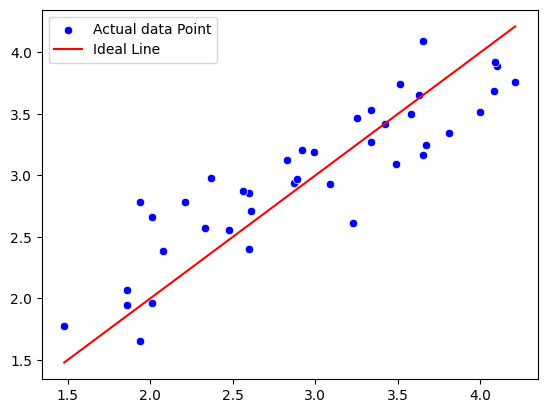

In [13]:
sns.scatterplot(x = y_test, y = y_pred, color='blue', label='Actual data Point')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

# **Resudual Analysis**
Actual - Predicted

In [14]:
residual = y_test - y_pred.reshape(-1)
print(residual)

[ 0.20888399  0.39675531 -0.30464568 -0.24434935  0.2862714  -0.29647803
 -0.21219258  0.15856138  0.44721294 -0.06701814 -0.44197872  0.48829133
 -0.08049525  0.19861576 -0.19809652 -0.21707251 -0.08386362  0.42610828
 -0.60607477  0.00314317 -0.07761079  0.48422156 -0.25890486 -0.29114229
  0.39532622 -0.3100639   0.08502989  0.46567692  0.17098639  0.04939782
 -0.02119666 -0.2904146  -0.23046898 -0.8463711  -0.57079158  0.06821068
 -0.18844723  0.61659401 -0.64804215 -0.10383735]


<Axes: ylabel='Density'>

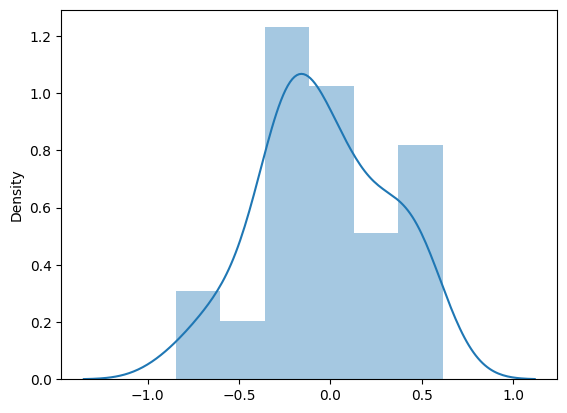

In [15]:
sns.distplot(residual, kde=True)